In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/drive/MyDrive/yield_df.csv')
print("Dataset Loaded ✅")
print(df.head())

X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]
y = df['Item']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Naive Bayes (Bayesian Decision Theory implementation)
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n✅ Model Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Dataset Loaded ✅
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

✅ Model Evaluation Results:
Accuracy: 0.3352805806337405

Confusion Matrix:
 [[ 22  30  98 115  41   4  11  60   9  19]
 [  0  88   8  44  58  55 385  16 138  26]
 [ 11   3  47  14  22   7   1   7   1   1]
 [ 29  18  85 564  27   3   9 113   2  18]


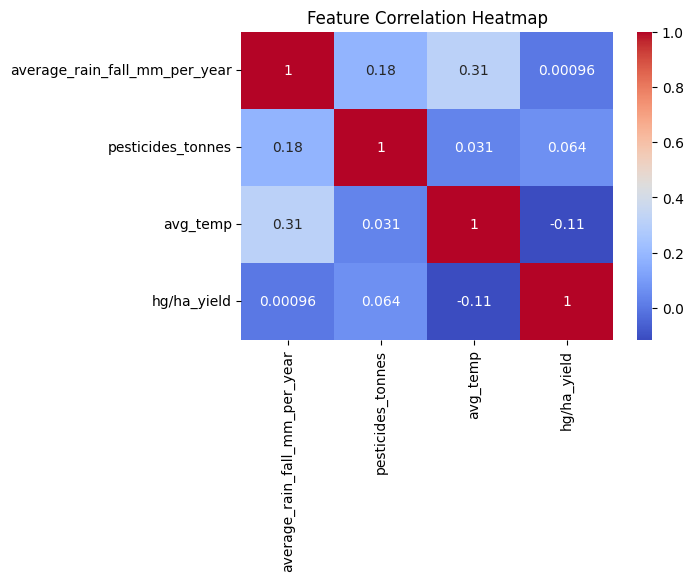

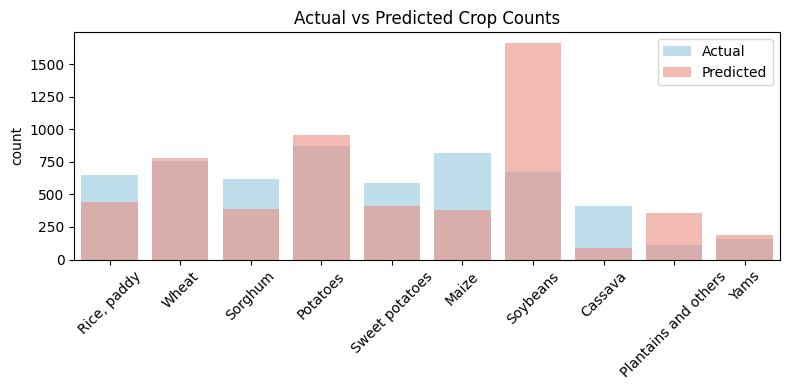

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#Actual vs Predicted comparison
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

plt.figure(figsize=(8,4))
sns.countplot(x=y_test_labels, color='skyblue', label='Actual', alpha=0.6)
sns.countplot(x=y_pred_labels, color='salmon', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Crop Counts')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

